In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/DELL/Desktop/Internships/Neuronetix/heart_2020_cleaned.csv")

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Data Processing

In [6]:
label_encoders = {}
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                       'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [7]:
data['HeartDisease'] = label_encoders['HeartDisease'] = LabelEncoder().fit_transform(data['HeartDisease'])

In [8]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

### Splitting the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train_scaled)

# Supervised Learning

### Logistic Regression

In [11]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

### Random Forest

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### Evaluation

In [13]:
log_reg_report = classification_report(y_test, y_pred_log_reg, output_dict=True)

In [14]:
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

### Comparison

In [15]:
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)

In [16]:
supervised_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_reg_acc, rf_acc],
    'Precision': [log_reg_report['1']['precision'], rf_report['1']['precision']],
    'Recall': [log_reg_report['1']['recall'], rf_report['1']['recall']],
    'F1-Score': [log_reg_report['1']['f1-score'], rf_report['1']['f1-score']]
})

print(supervised_comparison)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.912866   0.510053  0.086195  0.147468
1        Random Forest  0.904298   0.355227  0.116059  0.174956


# Unsupervised Learning

### K-Means

In [17]:
kmeans_model = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=1000)
kmeans_labels = kmeans_model.fit_predict(X_pca)

### Hierarchical

In [18]:
data_sample = X_pca[:len(X_pca)//10]  # Taking a 10% sample
hierarchical_model = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical_model.fit_predict(data_sample)

### Silhouette Score

In [19]:
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)

In [20]:
hierarchical_silhouette = silhouette_score(data_sample, hierarchical_labels)

### Comparison

In [21]:
unsupervised_comparison = pd.DataFrame({
    'Model': ['MiniBatch K-Means', 'Hierarchical Clustering (Sample)'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette]
})

print(unsupervised_comparison)

                              Model  Silhouette Score
0                 MiniBatch K-Means          0.333793
1  Hierarchical Clustering (Sample)          0.240910


### Visualization

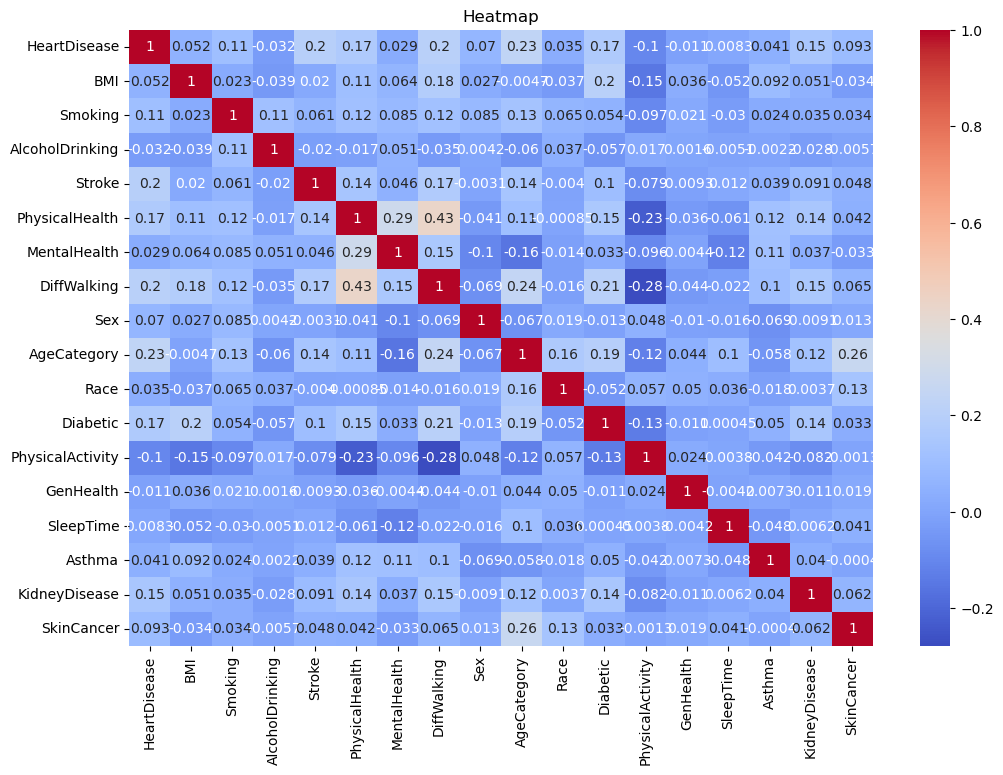

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

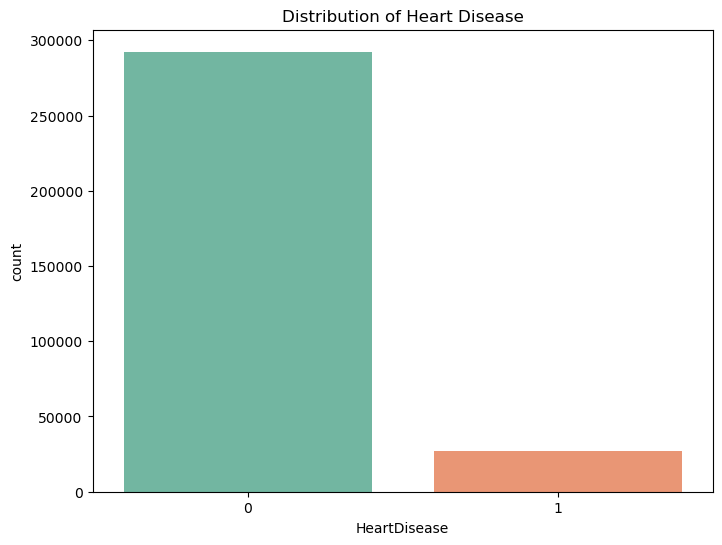

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='HeartDisease', data=data, palette='Set2')
plt.title('Distribution of Heart Disease')
plt.show()

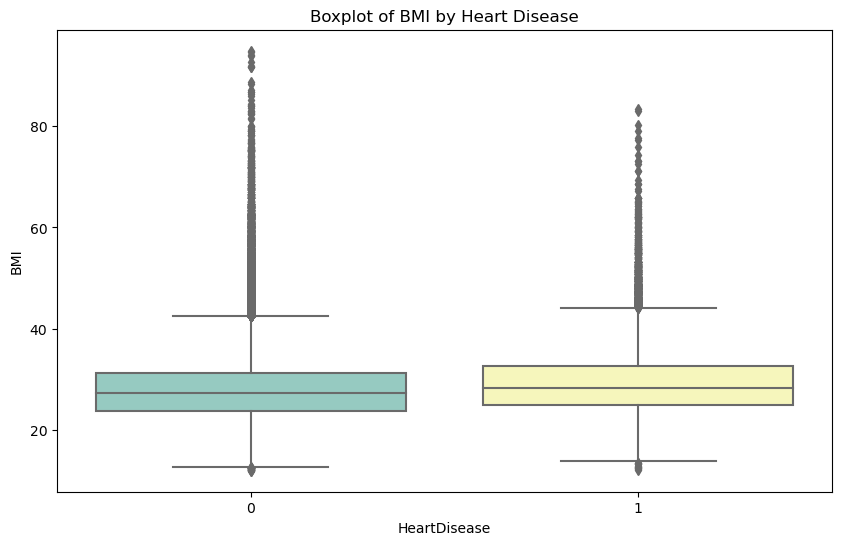

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='HeartDisease', y='BMI', data=data, palette='Set3')
plt.title('Boxplot of BMI by Heart Disease')
plt.show()

<Figure size 1000x600 with 0 Axes>

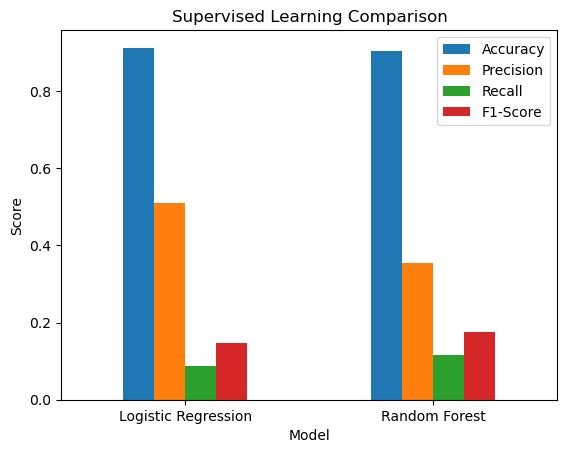

In [25]:
plt.figure(figsize=(10,6))
supervised_comparison.set_index('Model').plot(kind='bar', rot=0)
plt.title('Supervised Learning Comparison')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

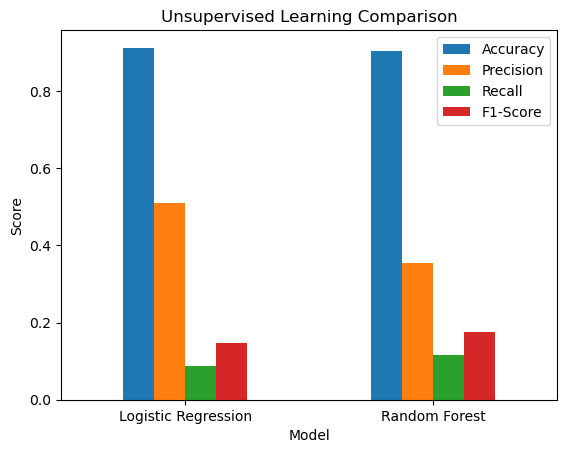

In [26]:
plt.figure(figsize=(10,6))
supervised_comparison.set_index('Model').plot(kind='bar', rot=0)
plt.title('Unsupervised Learning Comparison')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

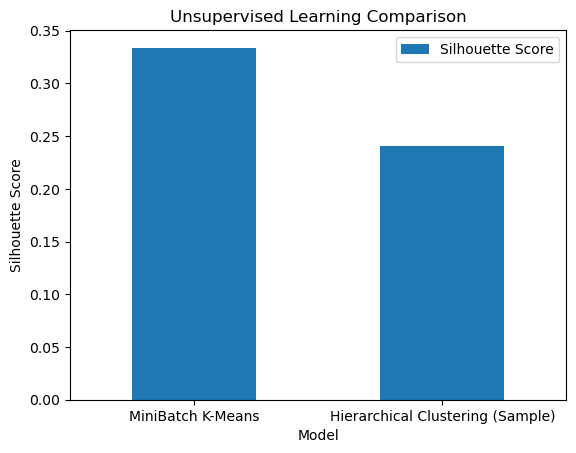

In [27]:
plt.figure(figsize=(10,6))

unsupervised_comparison.set_index('Model').plot(kind='bar', rot=0, legend=False)

plt.title('Unsupervised Learning Comparison')
plt.ylabel('Silhouette Score')
plt.legend(loc='upper right')
plt.show()